<a href="https://colab.research.google.com/github/Fernando-rangel86/proyecto_final_CD/blob/main/Proyecto_final_FernandoR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nombre del proyecto: *Identificación de factores que afectan el desempeño escolar en el área de matemáticas*
#Curso Formación Docentes en Ciencia de Datos
##Profesor: Kevin Sossa
###Estudiante: Fernando J Rangel


#Motivación:
Como docente de las asignaturas que hacen parte del área de matemáticas siempre siento algo de frustración al no lograr enseñar a todos mis estudiantes, y siendo conscientes de que en el aula a todos se les dan las mismas oportunidades y condiciones y algunos no muestran mejoras en sus resultados, por lo cual deben existir algunos otros factores que inciden en esa tendencia. Por esta razón decidí acercarme mas a ellos y construir un elemento de recolección de información que me permitiera conocer, más allá de aula, sus condiciones y el dominio o afección que tiene el contexto de la ruralidad en su rendimiento en las matemáticas, y con ello estudiar cuales son esas variables y en lo posible tomar decisiones que de manera progresiva ayuden a mitigar el impacto que tales factores producen en los resultados. Esto representa una gran oportunidad de mejora dentro del aula, al mismo tiempo que se afianza la relación entre el contexto y todos sus elementos.



#Objetivo general:
Identificar los factores que afectan el desempeño escolar en el área de matemáticas, en los estudiantes de la institución educativa el hobo, de los cursos 9° a 11° del año 2024.

#Objetivos específicos
* Diseñar un elemento de recolección de datos (formulario de Google), teniendo en cuenta la perspectiva de los estudiantes de la institución en el contexto de la ruralidad
* Agrupar las variables en contexto, en casa, en la escuela
Mostrar la distribución y medidas de tendencia central, dispersión y posición de las variables categóricas en el grupo contexto: distancia a la escuela, medio de transporte, estado de las vías.
* Mostrar la distribución y medidas de tendencia central, dispersión y posición de las variables categóricas el grupo en casa: tiempo de sueño, calidad del sueño, tiempo de estudio, acceso a material, involucramiento de padres, investigación.
* Mostrar la distribución y medidas de tendencia central, dispersión y posición de las variables categóricas el grupo en la escuela: ausentismo, motivación, desempeño en matemáticas, recuperaciones, interés, comprensión, calidad del docente.
* Representar gráficamente las variables relevantes de los datos obtenidos.
* Establecer las correlaciones entre las diferentes variables
* Realizar conclusiones de la descripción estadística


#Importar los datos
Los datos se importan desde un google Google Sheets generado por un formailario de google

In [1]:
# librerias para conectar a google sheets
import gspread
from google.colab import auth
from google.auth import default

from oauth2client.client import GoogleCredentials

In [2]:
# Autenticación de Usuario
auth.authenticate_user()
creds, _ = default()
# Abrir Google Sheets
gc = gspread.authorize(creds)

In [3]:
# Importar 'Datos para el proyecto'
spreadsheet = gc.open('Resultados_paraproy') # ruta del archivo

# Seeleccionar la hoja
hoja_de_datos = spreadsheet.get_worksheet(0)

#Importar Librerias para analisis

In [4]:
# librerias usadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# La tabla en la hoja de calculo
data = hoja_de_datos.get_all_values()

# Convertimos esa tabla a un Dataframe Pandas
df = pd.DataFrame(data[1:], columns=data[0])  # Assuming the first row contains headers

df

,Marca temporal,Sexo,Distancia a escuela,Medio de transporte,Estado de las vias,Duracion del sueño,Calidad del sueño,Ausentismo escolar,Motivación,Desempeño en matemáticas,Debo recuperar matemáticas,gusto por la matemática,Comprensión de matemáticas,Horas de estudio,Acceso a material,Involucramiento de padres,investigo matemáticas,Otros factores,Calidad del docente
0,13/11/2024 20:47:01,Femenino,Lejos (de 3 a 5km),A pie,Regular ( camino destapado en buen estado),Bastante mala ( menos de 5 horas),Si,No,Sí,"Básico (Notas de 3 a 3,9)",Si,No,Sí,Menos de 1 hora,No,Poco,Solo si tengo tareas,,5
1,13/11/2024 21:00:25,Masculino,Media (de 1 a 3 km),A pie,"Mala (camino destapado, cruce de arroyos o pot...",Bastante buena (más de 7 horas),Si,No,Sí,"Básico (Notas de 3 a 3,9)",No,Sí,Sí,Menos de 1 hora,Sí,Poco,A veces,,5
2,13/11/2024 21:04:06,Masculino,Muy lejos (más de 5km),A pie,"Mala (camino destapado, cruce de arroyos o pot...",Mala (de 5 a 6 horas),Si,No,Sí,Bajo (notas inferiores a 3),Si,Sí,No,No estudio en casa.,No,No se involucran,Solo si tengo tareas de matemáticas,Que me distraigo mucho no entiendo lo que el p...,5
3,13/11/2024 21:06:56,Femenino,Lejos (de 3 a 5km),A pie,"Mala (camino destapado, cruce de arroyos o pot...",Buena (de 6 a 7 horas),Si,No,Sí,"Básico (Notas de 3 a 3,9)",Si,Sí,Sí,No estudio en casa.,No,No se involucran,Solo si tengo tareas de matemáticas,,4
4,13/11/2024 21:08:22,Femenino,Cerca (menos de 1 km),A pie,Regular ( camino destapado en buen estado),Bastante buena (más de 7 horas),Si,No,Sí,"Alto (Notas de 4 a 4,5)",No,Sí,Sí,De 1 a 3 horas,Sí,No se involucran,A veces,,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,27/11/2024 14:43:46,Femenino,Muy lejos (más de 5km),A pie,"Mala (camino destapado, cruce de arroyos o pot...",Buena (de 6 a 7 horas),Si,No,Sí,"Básico (Notas de 3 a 3,9)",Si,Sí,Sí,Menos de 1 hora,No,Poco,Solo si tengo tareas de matemáticas,,4
62,27/11/2024 14:45:23,Femenino,Lejos (de 3 a 5km),En motocicleta,"Mala (camino destapado, cruce de arroyos o pot...",Bastante buena (más de 7 horas),Si,No,Sí,"Básico (Notas de 3 a 3,9)",No,Sí,Sí,Menos de 1 hora,Sí,Algo,A veces,Las redes,4
63,27/11/2024 14:46:41,Masculino,Cerca (menos de 1 km),A pie,"Mala (camino destapado, cruce de arroyos o pot...",Buena (de 6 a 7 horas),Si,No,No,Bajo (notas inferiores a 3),Si,No,No,No estudio en casa.,No,No se involucran,Solo si tengo tareas de matemáticas,,4
64,27/11/2024 14:48:29,Masculino,Media (de 1 a 3 km),A pie,Regular ( camino destapado en buen estado),Buena (de 6 a 7 horas),Si,No,Sí,Bajo (notas inferiores a 3),Si,No,Sí,No estudio en casa.,No,Poco,Solo si tengo tareas de matemáticas,No hago tareas,4


caracteristicas de la tabla

In [6]:
#caracteristicas de la tabla
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Marca temporal              66 non-null     object
 1   Sexo                        66 non-null     object
 2   Distancia a escuela         66 non-null     object
 3   Medio de transporte         66 non-null     object
 4   Estado de las vias          66 non-null     object
 5   Duracion del sueño          66 non-null     object
 6   Calidad del sueño           66 non-null     object
 7   Ausentismo escolar          66 non-null     object
 8   Motivación                  66 non-null     object
 9   Desempeño en matemáticas    66 non-null     object
 10  Debo recuperar matemáticas  66 non-null     object
 11  gusto por la matemática     66 non-null     object
 12  Comprensión de matemáticas  66 non-null     object
 13  Horas de estudio            66 non-null     object
 

In [7]:
#eliminar la columna Marca temporal
df = df.drop(columns=['Marca temporal'])

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Sexo                        66 non-null     object
 1   Distancia a escuela         66 non-null     object
 2   Medio de transporte         66 non-null     object
 3   Estado de las vias          66 non-null     object
 4   Duracion del sueño          66 non-null     object
 5   Calidad del sueño           66 non-null     object
 6   Ausentismo escolar          66 non-null     object
 7   Motivación                  66 non-null     object
 8   Desempeño en matemáticas    66 non-null     object
 9   Debo recuperar matemáticas  66 non-null     object
 10  gusto por la matemática     66 non-null     object
 11  Comprensión de matemáticas  66 non-null     object
 12  Horas de estudio            66 non-null     object
 13  Acceso a material           66 non-null     object
 

##Variables del grupo "contexto"
Aquí analizaremos esas variables propias del contexto rural

In [9]:
#Mostrar los diferentes tipos de Distancia a la escuela
Distancias= df['Distancia a escuela'].unique()
print('Distancias a la escuela=', Distancias)


Distancias a la escuela= ['Lejos (de 3 a 5km)' 'Media (de 1 a 3 km)' 'Muy lejos (más de 5km)'
 'Cerca (menos de 1 km)']


In [10]:
#Mostrar los diferentes Medios de transporte
Medios_de_transp= df['Medio de transporte'].unique()
print('Medios de transporte=', Medios_de_transp)

Medios de transporte= ['A pie' 'En carro' 'En motocicleta']


In [11]:
#Mostrar los diferentes Estados de las vías
Estados_de_vias= df['Estado de las vias'].unique()
print('Estados de las vías=', Estados_de_vias)

Estados de las vías= ['Regular ( camino destapado en buen estado)'
 'Mala (camino destapado, cruce de arroyos o potreros)'
 'Muy buena ( camino de asfalto o cemento)']


##Variables del grupo "En casa"
hacen parte esas variables que se dan dentro de los hogares de los estudiantes encuestados.

In [12]:
#Mostrar los diferentes tipos Duración del sueño
Duracion_del_sueño= df['Duracion del sueño'].unique()
print('Duración del sueño=', Duracion_del_sueño)


Duración del sueño= ['Bastante mala ( menos de 5 horas)' 'Bastante buena (más de 7 horas)'
 'Mala (de 5 a 6 horas)' 'Buena (de 6 a 7 horas)']


In [13]:
#Mostrar los diferentes tipos de Horas de estudio
Horas_de_estudio= df['Horas de estudio'].unique()
print('Horas de estudio de matemáticas=', Horas_de_estudio)


Horas de estudio de matemáticas= ['Menos de 1 hora' 'No estudio en casa.' 'De 1 a 3 horas' 'De 3 a 5 horas']


In [14]:
#Mostrar los diferentes tipos de Acceso a Material
Acceso_a_Material= df['Acceso a material'].unique()
print('tiene acceso a material de estudio=', Acceso_a_Material)

tiene acceso a material de estudio= ['No' 'Sí']


In [15]:
#Mostrar los diferentes tipos de Involucramiento de padres
Involucramiento_de_padres= df['Involucramiento de padres'].unique()
print('Involucramiento de padres=', Involucramiento_de_padres)

Involucramiento de padres= ['Poco' 'No se involucran' 'Mucho' 'Algo']


In [16]:
#Mostrar los diferentes tipos de la columna Investigo matemáticas
Investigo_mat= df['investigo matemáticas'].unique()
print('Investigo matematicas=', Investigo_mat)


Investigo matematicas= ['Solo si tengo tareas' 'A veces' 'Solo si tengo tareas de matemáticas'
 'Siempre' 'Frecuentemente']


## Variables del Grupo "En la escuela"

In [17]:
#Mostrar los diferentes tipos de la columna Ausentismo escolar
Ausentismo_escolar= df['Ausentismo escolar'].unique()
print('Ausentismo escolar=', Ausentismo_escolar)

Ausentismo escolar= ['No' 'Sí']


In [18]:
#Mostrar los diferentes tipos de la columna Motivación
Motivacion= df['Motivación'].unique()
print('El estudiante se siente motivado=', Motivacion)

El estudiante se siente motivado= ['Sí' 'No']


In [19]:
#Mostrar los diferentes tipos de la columna Desempeño en matemáticas
Desempeño_mat= df['Desempeño en matemáticas'].unique()
print('Nivel de desempeño en matemáticas=', Desempeño_mat)

Nivel de desempeño en matemáticas= ['Básico (Notas de 3 a 3,9)' 'Bajo (notas inferiores a 3)'
 'Alto (Notas de 4 a 4,5)' 'Superior(Notas de 4,6 a 5)']


In [20]:
#Mostrar los diferentes tipos de la columna Debo recuperar matemáticas
Debo_recuperar_mat= df['Debo recuperar matemáticas'].unique()
print('El estudiante con frecuencia debe recuperar matemáticas=', Debo_recuperar_mat)

El estudiante con frecuencia debe recuperar matemáticas= ['Si' 'No']


In [21]:
#Mostrar los diferentes tipos de la columna gusto por la matemática
gusto_por_mat= df['gusto por la matemática'].unique()
print('A el estudiante le gustan las matemáticas=', gusto_por_mat)

A el estudiante le gustan las matemáticas= ['No' 'Sí']


In [22]:
#Mostrar los diferentes tipos de la columna Comprensión de matemáticas
Comprension_mat= df['Comprensión de matemáticas'].unique()
print('El estudiante entiende matemáticas=', Comprension_mat)


El estudiante entiende matemáticas= ['Sí' 'No']


In [23]:
#Mostrar los diferentes tipos de la columna Calidad del docente
Calidad_docente= df['Calidad del docente'].unique()
print('Como califica al docente=', Calidad_docente)


Como califica al docente= ['5' '4' '3']


#verificacion de datos faltantes o nulos

In [24]:
# Verificar la cantidad de datos faltantes en cada columna
faltantes = df.isnull().sum()
faltantes

,0
Sexo,0
Distancia a escuela,0
Medio de transporte,0
Estado de las vias,0
Duracion del sueño,0
Calidad del sueño,0
Ausentismo escolar,0
Motivación,0
Desempeño en matemáticas,0
Debo recuperar matemáticas,0


#Análisis preliminar

la exploracion inicial de los datos nos muestra que:


*   Los datos recolectados corresponden a 66 estudiantes de diferentes sexos en donde se generó informacion para 18 columnas.
Sexo, Distancia a la escuela, Medio de transporte, estados de las vías, duracion del sueño, calidad del sueño, Ausentismo escolar, Motivacion, Desempeño en matemáticas, Debo recuperar matemáticas, gusto por la matemática, Comprensión de matemáticas, Horas de estudio, Acceso a material, Involucramiento de padres, Investigo matematicas, Calidad del docente y otros factores.
*   las columnas se agruparon en 3 grupos de manera que se puedan establcer relaciones entre 3 espacios diferentes; En la escuela, en casa, y en el contexto de la ruralidad.

*   No se encontraron datos nulos en el registro.
*  

#Estadisticas descriptivas del grupo "Contexto"

In [25]:
# Estadísticas para variables categóricas
Grup_contex = df[['Distancia a escuela', 'Medio de transporte', 'Estado de las vias', 'Sexo']].describe()

# Mostrar estadísticas descriptivas
Grup_contex

,Distancia a escuela,Medio de transporte,Estado de las vias,Sexo
count,66,66,66,66
unique,4,3,3,2
top,Cerca (menos de 1 km),A pie,Muy buena ( camino de asfalto o cemento),Femenino
freq,26,61,30,38


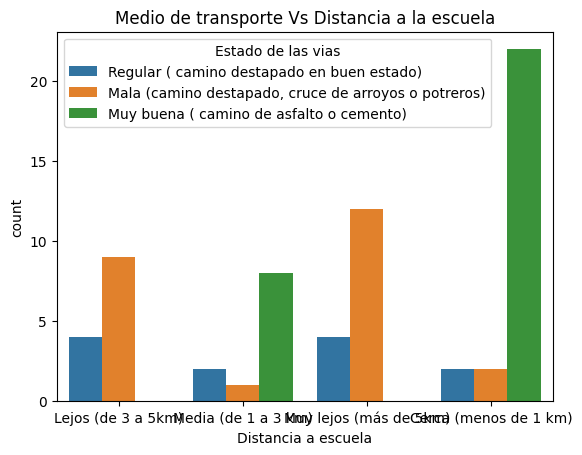

In [26]:
#generar un grafico de Estado de las vias y Distancia a la escuela
sns.countplot(x='Distancia a escuela', hue='Estado de las vias', data=df)
plt.title('Medio de transporte Vs Distancia a la escuela')
plt.show()


Se puede inferir que la maroria de los estudiantes encuestados viven cerca de la escuela, se trasladan a pie y el estado de las vias es muy buena.

#Estadisticas descriptivas del grupo "En casa"

In [27]:
# Estadísticas para variables categóricas
Grup_casa = df[['Duracion del sueño', 'Calidad del sueño', 'Horas de estudio', 'Acceso a material', 'Involucramiento de padres', 'investigo matemáticas', 'Sexo']].describe()

# Mostrar estadísticas descriptivas
Grup_casa

,Duracion del sueño,Calidad del sueño,Horas de estudio,Acceso a material,Involucramiento de padres,investigo matemáticas,Sexo
count,66,66,66,66,66,66,66
unique,4,2,4,2,4,5,2
top,Buena (de 6 a 7 horas),Si,No estudio en casa.,No,No se involucran,Solo si tengo tareas de matemáticas,Femenino
freq,34,63,30,45,27,39,38


El análisis de los datos de este grupo nos indica lo siguiente:

*   En cuanto a la duración y calidad del sueño se puede afirmar que es buena en la mayoría,
*   Se puede evidenciar que no existe una cultura del estudio, repaso o investigación de las áreas de las matemáticas, los estudiantes solo investigan o repasan si se les demanda por medio de tareas o consultas.
*   Existe evidencia de que mayoritariamente los acudientes o padres de familia no se involucran en el apoyo y seguimiento académico de sus acudidos.






#Estadisticas descriptivas del grupo "En la escuela"

In [28]:
# Estadísticas para variables categóricas del grupo "En la escuela"
Grup_escuela = df[['Ausentismo escolar', 'Motivación', 'Desempeño en matemáticas', 'Debo recuperar matemáticas', 'gusto por la matemática',  'Comprensión de matemáticas', 'Calidad del docente']].describe()

# Mostrar estadísticas descriptivas
Grup_escuela

,Ausentismo escolar,Motivación,Desempeño en matemáticas,Debo recuperar matemáticas,gusto por la matemática,Comprensión de matemáticas,Calidad del docente
count,66,66,66,66,66,66,66
unique,2,2,4,2,2,2,3
top,No,Sí,"Básico (Notas de 3 a 3,9)",Si,Sí,Sí,4
freq,61,60,28,45,50,56,39


Análisis

Los datos arrojan que la mayoría de los estudiantes obtiene notas en el rango básico (de 3 a 3,9) pero que también muchos más deben esta frecuentemente en procesos de recuperación de exámenes y refuerzos, la mayoría tiene gusto y comprende matemáticas y piensan que la calidad del docente es en la mayoría de los casos, de 4 puntos de 5 posibles. No hay evidencia de ausentismo escolar


#Graficos de distribución de variables representativas

In [29]:
#ver la frecuencia de la categoria Sexo
frec_sexo = df['Sexo'].value_counts()
frec_sexo

,count
Sexo,
Femenino,38
Masculino,28


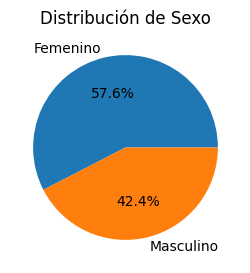

In [30]:
#Grafico de pastel de la columna Sexo
plt.figure(figsize=(3, 3))
plt.pie(frec_sexo.values, labels=frec_sexo.index, autopct='%1.1f%%')
plt.title('Distribución de Sexo')
plt.show()

In [31]:
#ver la frecuencia de la categoria Calidad del sueño
frec_cal_sue = df['Calidad del sueño'].value_counts()
frec_cal_sue

,count
Calidad del sueño,
Si,63
No,3


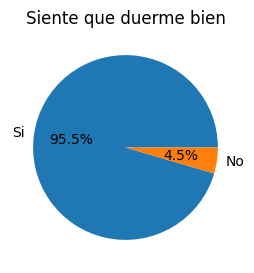

In [32]:
#Grafico de pastel de la columna Caclidad del sueño
plt.figure(figsize=(3, 3))
plt.pie(frec_cal_sue.values, labels=frec_cal_sue.index, autopct='%1.1f%%')
plt.title('Siente que duerme bien')
plt.show()

In [33]:
#ver la frecuencia de la categoria Distancia a la escuela
frec_dis_esc = df['Distancia a escuela'].value_counts()
frec_dis_esc

,count
Distancia a escuela,
Cerca (menos de 1 km),26
Muy lejos (más de 5km),16
Lejos (de 3 a 5km),13
Media (de 1 a 3 km),11


<function matplotlib.pyplot.show(close=None, block=None)>

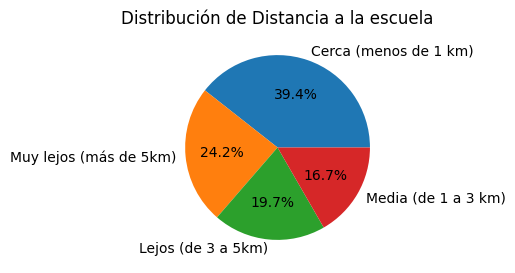

In [34]:
#Grafico de pastel de la columna Distancia a escuela
plt.figure(figsize=(3, 3))
plt.pie(frec_dis_esc.values, labels=frec_dis_esc.index, autopct='%1.1f%%')
plt.title('Distribución de Distancia a la escuela')
plt.show

In [35]:
#ver la frecuencia de la categoria Medio de transporte
frec_med_trans = df['Medio de transporte'].value_counts()
frec_med_trans

,count
Medio de transporte,
A pie,61
En motocicleta,4
En carro,1


<function matplotlib.pyplot.show(close=None, block=None)>

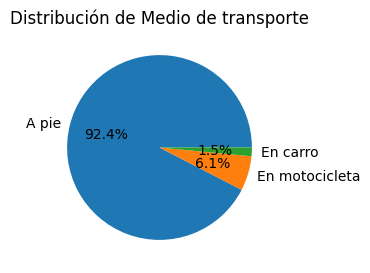

In [36]:
#Grafico de pastel de la columna Medio de trasnporte
plt.figure(figsize=(3, 3))
plt.pie(frec_med_trans.values, labels=frec_med_trans.index, autopct='%1.1f%%')
plt.title('Distribución de Medio de transporte')
plt.show

In [37]:
#ver la frecuencia de la categoria Desempeño en matemáticas
frec_desem_mat = df['Desempeño en matemáticas'].value_counts()
frec_desem_mat

,count
Desempeño en matemáticas,
"Básico (Notas de 3 a 3,9)",28
Bajo (notas inferiores a 3),26
"Alto (Notas de 4 a 4,5)",10
"Superior(Notas de 4,6 a 5)",2


Text(0.5, 1.0, 'Distribución de Desempeño en matemáticas')

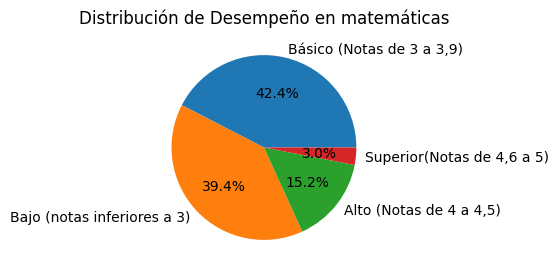

In [38]:
#Grafico de pastel de la columna Desempeño en matemáticas
plt.figure(figsize=(3, 3))
plt.pie(frec_desem_mat.values, labels=frec_desem_mat.index, autopct='%1.1f%%')
plt.title('Distribución de Desempeño en matemáticas')

In [39]:
#ver la frecuencia de la categoria Debo recuperar matemáticas
frec_debo_rec = df['Debo recuperar matemáticas'].value_counts()
frec_debo_rec

,count
Debo recuperar matemáticas,
Si,45
No,21


Text(0.5, 1.0, 'Debo recuperar matemáticas')

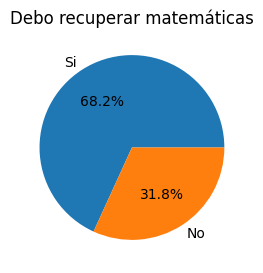

In [40]:
#Grafico de pastel de la columna Debo recuperar matemáticas
plt.figure(figsize=(3, 3))
plt.pie(frec_debo_rec.values, labels=frec_debo_rec.index, autopct='%1.1f%%')
plt.title('Debo recuperar matemáticas')


In [41]:
#ver la frecuencia de la categoria Horas de estudio
frec_horas_est = df['Horas de estudio'].value_counts()
frec_horas_est

,count
Horas de estudio,
No estudio en casa.,30
Menos de 1 hora,24
De 1 a 3 horas,11
De 3 a 5 horas,1


Text(0.5, 1.0, 'Horas de estudio de matemáticas semanal en casa')

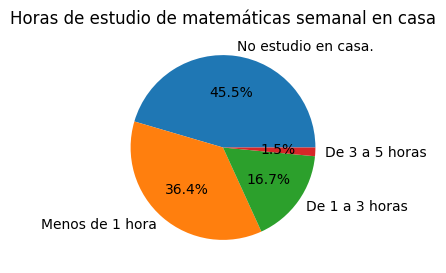

In [42]:
#Grafico de pastel de la columna Horas de estudio
plt.figure(figsize=(3, 3))
plt.pie(frec_horas_est.values, labels=frec_horas_est.index, autopct='%1.1f%%')
plt.title('Horas de estudio de matemáticas semanal en casa')

In [43]:
#ver la frecuencia de la categoria Acceso a material de estudio
frec_acc_mat = df['Acceso a material'].value_counts()
frec_acc_mat

,count
Acceso a material,
No,45
Sí,21


Text(0.5, 1.0, 'Acceso a material de estudio')

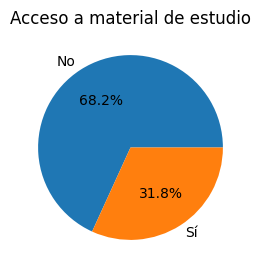

In [44]:
#Grafico de pastel de la columna Acceso a material
plt.figure(figsize=(3, 3))
plt.pie(frec_acc_mat.values, labels=frec_acc_mat.index, autopct='%1.1f%%')
plt.title('Acceso a material de estudio')


In [45]:
# Ver frecuencias de la variable investigo matemáticas
frec_inv_mat = df['investigo matemáticas'].value_counts()
frec_inv_mat

,count
investigo matemáticas,
Solo si tengo tareas de matemáticas,39
A veces,21
Frecuentemente,3
Siempre,2
Solo si tengo tareas,1


Text(0.5, 1.0, 'Investigo matemáticas')

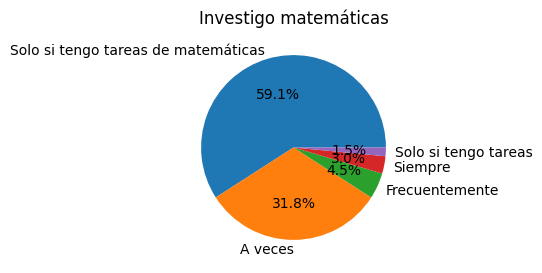

In [46]:
#Grafico de pastel de la columna Investigo matemáticas
plt.figure(figsize=(3, 3))
plt.pie(frec_inv_mat.values, labels=frec_inv_mat.index, autopct='%1.1f%%')
plt.title('Investigo matemáticas')


In [47]:
#ver fercuencias de la variable Involucramiento de padres
frec_inv_pad = df['Involucramiento de padres'].value_counts()
frec_inv_pad

,count
Involucramiento de padres,
No se involucran,27
Poco,25
Algo,11
Mucho,3


Text(0.5, 1.0, 'Involucramiento de padres')

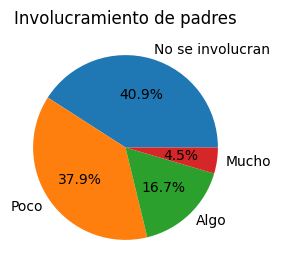

In [48]:
#Grafico de pastel de la variable Involucramiento de padres
plt.figure(figsize=(3, 3))
plt.pie(frec_inv_pad.values, labels=frec_inv_pad.index, autopct='%1.1f%%')
plt.title('Involucramiento de padres')


In [49]:
# Ver frecuencias de la variable Calidad del docente
frec_cal_doc = df['Calidad del docente'].value_counts()
frec_cal_doc

,count
Calidad del docente,
4,39
5,24
3,3


Text(0.5, 1.0, 'Calidad del docente')

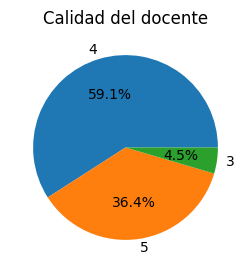

In [50]:
#Grafico de pastel de la variable Calidad del docente
plt.figure(figsize=(3, 3))
plt.pie(frec_cal_doc.values, labels=frec_cal_doc.index, autopct='%1.1f%%')
plt.title('Calidad del docente')

#Analisis de correlación

Analizaremos la correlación entre aquellos estudiantes que tienen un nivel de desempeño bajo y básico, frente a otras variables, y entre aquellos estudiantes que deben frecuentemente realizar recuperaciones de matemáticas, frente a otras variables.


## Desempeño en matemáticas Vs Horas de estudio

In [51]:
#descriptores numéricos del analisis bivariado
df.groupby('Desempeño en matemáticas')['Horas de estudio'].describe()

,count,unique,top,freq
Desempeño en matemáticas,,,,
"Alto (Notas de 4 a 4,5)",10,2,De 1 a 3 horas,6
Bajo (notas inferiores a 3),26,2,No estudio en casa.,23
"Básico (Notas de 3 a 3,9)",28,4,Menos de 1 hora,16
"Superior(Notas de 4,6 a 5)",2,2,Menos de 1 hora,1


In [52]:
#Tabla de contingencia entre Desempeño en matemáticas y Horas de estudio
tabla_contingencia1 = pd.crosstab(df['Desempeño en matemáticas'], df['Horas de estudio'])

# Mostrar la tabla de contingencia
tabla_contingencia1

Horas de estudio,De 1 a 3 horas,De 3 a 5 horas,Menos de 1 hora,No estudio en casa.
Desempeño en matemáticas,,,,
"Alto (Notas de 4 a 4,5)",6,0,4,0
Bajo (notas inferiores a 3),0,0,3,23
"Básico (Notas de 3 a 3,9)",4,1,16,7
"Superior(Notas de 4,6 a 5)",1,0,1,0


Text(0.5, 1.0, 'Desempeño en matemáticas vs Horas de estudio')

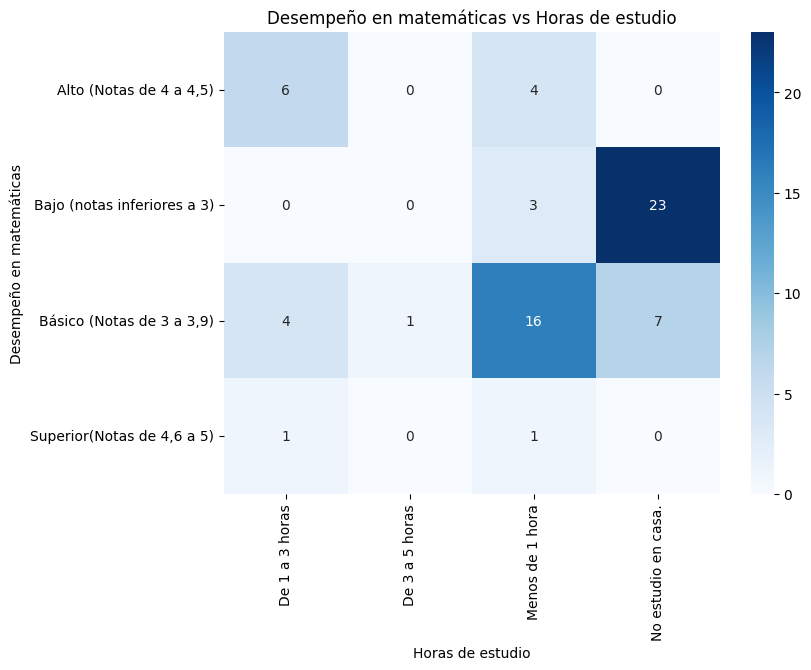

In [53]:
# Gráfico de calor (heatmap) de Desempeño en matemáticas y Horas de estudio
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_contingencia1, annot=True, cmap='Blues', fmt='d')
plt.title('Desempeño en matemáticas vs Horas de estudio')

Análisis:
Se puede evidenciar que la mayor frecuencia de estudiantes que tienen un nivel de desempeño bajo (notas inferiores a 3.0) coincide con aquellos (23) que manifiestan que no dedican horas de estudio de las matemáticas al semana en casa. Los estudiantes que manifiestan estudiar al menos una hora (16) a la semana, muestran desempeños básicos (de 3 a 3,9) en las asignaturas.


##Desempeño en Matematicas Vs Involucramiento de padres

In [54]:
#descriptores numéricos del analisis bivariado Desempeño en matemáticas con Involucramiento de padres
df.groupby('Involucramiento de padres')['Desempeño en matemáticas'].describe()

,count,unique,top,freq
Involucramiento de padres,,,,
Algo,11,4,"Básico (Notas de 3 a 3,9)",5
Mucho,3,2,"Alto (Notas de 4 a 4,5)",2
No se involucran,27,4,Bajo (notas inferiores a 3),14
Poco,25,3,"Básico (Notas de 3 a 3,9)",11


In [55]:
#Tabla de contingencia entre Desempeño en matemáticas e Involucramiento de padres
tabla_contingencia2 = pd.crosstab(df['Desempeño en matemáticas'], df['Involucramiento de padres'])

# Mostrar la tabla de contingencia
tabla_contingencia2

Involucramiento de padres,Algo,Mucho,No se involucran,Poco
Desempeño en matemáticas,,,,
"Alto (Notas de 4 a 4,5)",3,2,1,4
Bajo (notas inferiores a 3),2,0,14,10
"Básico (Notas de 3 a 3,9)",5,1,11,11
"Superior(Notas de 4,6 a 5)",1,0,1,0


Text(0.5, 1.0, 'Desempeño en matemáticas vs Involucramiento de padres')

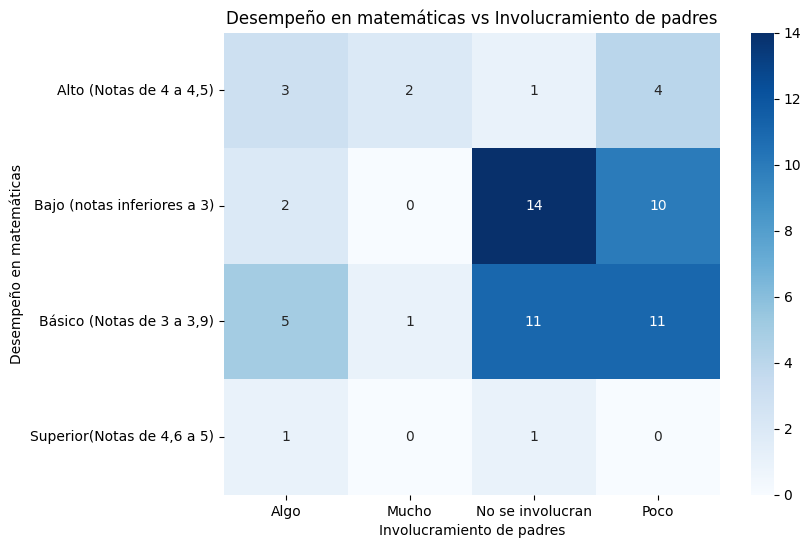

In [56]:
#Gráfico de calor (heatmap) de Desempeño en matemáticas e Involucramiento de padres
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_contingencia2, annot=True, cmap='Blues', fmt='d')
plt.title('Desempeño en matemáticas vs Involucramiento de padres')

Text(0.5, 0, 'Desempeño en matemáticas')

<Figure size 800x600 with 0 Axes>

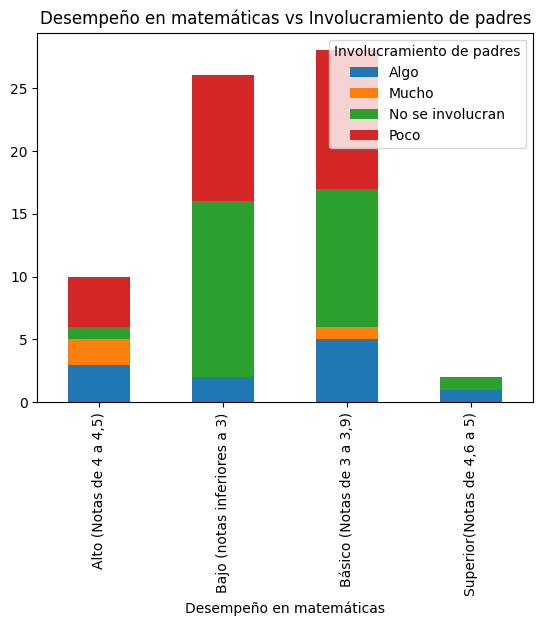

In [57]:
# Gráfico de barras apiladas entre Desempeño en matemáticas e Involucramiento de padres
plt.figure(figsize=(8, 6))
tabla_contingencia2.plot(kind='bar', stacked=True)
plt.title('Desempeño en matemáticas vs Involucramiento de padres')
plt.xlabel('Desempeño en matemáticas')

Análisis:
Se puede establecer que los resultados bajos en el desempeño en las matemáticas si se ve influenciada por el que tanto se involucran los padres de familia o acudientes en el acompañamiento y vigilancia a los procesos escolares.
El bajo rendimiento en matemáticas se correlaciona con aquellos estudiantes a los que sus padres o acudientes no realizan acompañamiento, apoyo y control de los procesos en la escuela.


##Desempeño en matemáticas Vs Acceso a material

In [58]:
#descriptores numéricos del analisis bivariado Desempeño en matemáticas con Acceso a material
df.groupby('Desempeño en matemáticas')['Acceso a material'].describe()

,count,unique,top,freq
Desempeño en matemáticas,,,,
"Alto (Notas de 4 a 4,5)",10,2,Sí,7
Bajo (notas inferiores a 3),26,2,No,24
"Básico (Notas de 3 a 3,9)",28,2,No,17
"Superior(Notas de 4,6 a 5)",2,2,No,1


In [59]:
#Tabla de contingencia entre Desempeño en matemáticas y Acceso a material
tabla_contingencia3 = pd.crosstab(df['Desempeño en matemáticas'], df['Acceso a material'])

# Mostrar la tabla de contingencia
tabla_contingencia3

Acceso a material,No,Sí
Desempeño en matemáticas,,
"Alto (Notas de 4 a 4,5)",3,7
Bajo (notas inferiores a 3),24,2
"Básico (Notas de 3 a 3,9)",17,11
"Superior(Notas de 4,6 a 5)",1,1


Text(0.5, 1.0, 'Desempeño en matemáticas vs Acceso a material')

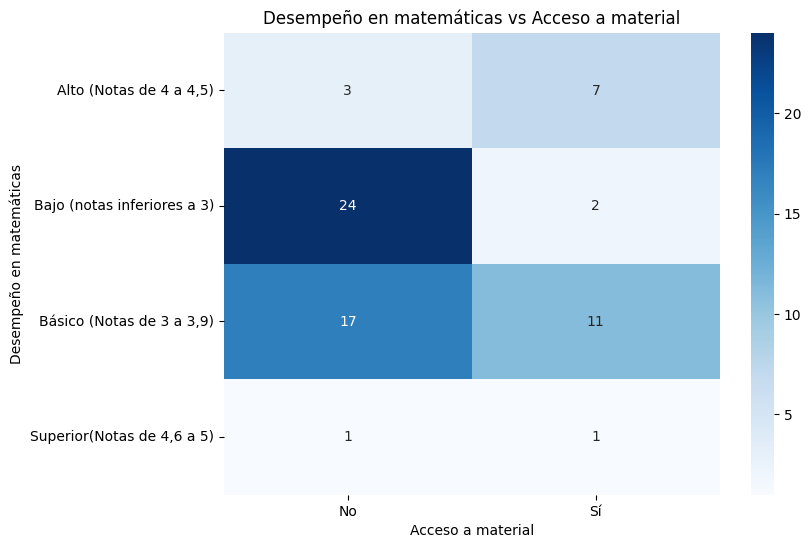

In [60]:
#Gráfico de calor (heatmap) de Desempeño en matemáticas y Acceso a material
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_contingencia3, annot=True, cmap='Blues', fmt='d')
plt.title('Desempeño en matemáticas vs Acceso a material')

Text(0.5, 0, 'Desempeño en matemáticas')

<Figure size 800x600 with 0 Axes>

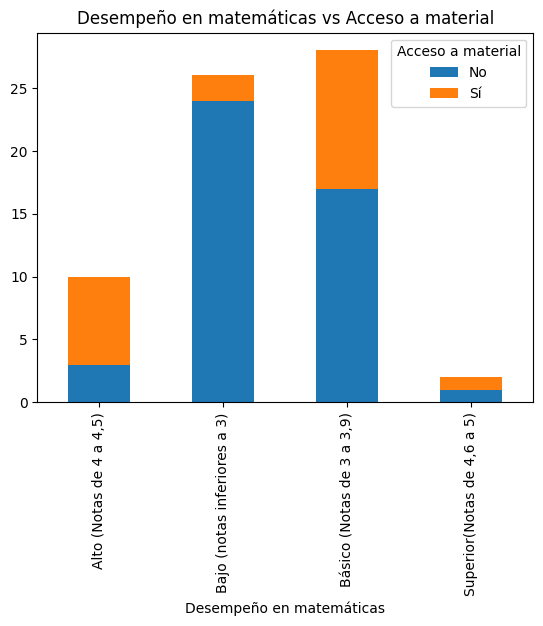

In [61]:
# Gráfico de barras apiladas entre Desempeño en matemáticas y Acceso a material
plt.figure(figsize=(8, 6))
tabla_contingencia3.plot(kind='bar', stacked=True)
plt.title('Desempeño en matemáticas vs Acceso a material')
plt.xlabel('Desempeño en matemáticas')

In [62]:
# tabla de contingencia de tres entradas con Desempeño en matemáticas, Estudio en casa, Acceso a Material
tabla_contingencia4 = pd.crosstab([df['Desempeño en matemáticas'], df['Horas de estudio']], df['Acceso a material'])

# Mostrar la tabla de contingencia
tabla_contingencia4

Acceso a material                                No  Sí
Desempeño en matemáticas    Horas de estudio           
Alto (Notas de 4 a 4,5)     De 1 a 3 horas        2   4
                            Menos de 1 hora       1   3
Bajo (notas inferiores a 3) Menos de 1 hora       3   0
                            No estudio en casa.  21   2
Básico (Notas de 3 a 3,9)   De 1 a 3 horas        3   1
                            De 3 a 5 horas        1   0
                            Menos de 1 hora       7   9
                            No estudio en casa.   6   1
Superior(Notas de 4,6 a 5)  De 1 a 3 horas        0   1
                            Menos de 1 hora       1   0

Analisis:
Es notable que aquellos estudiantes que en sus casas no tienen acceso a material bibliográfico del área de matemáticas y además sus padres o acudientes no realizan el acompañamiento necesario involucrándose activamente en los procesos, muestran un bajo desempeño en el área de matemáticas.

## Desempeño en matematicas Vs Distancia a la escuela

In [63]:
#descriptores numéricos del analisis bivariado Desempeño en matemáticas con Distancia a escuela
df.groupby('Desempeño en matemáticas')['Distancia a escuela'].describe()

,count,unique,top,freq
Desempeño en matemáticas,,,,
"Alto (Notas de 4 a 4,5)",10,4,Cerca (menos de 1 km),4
Bajo (notas inferiores a 3),26,4,Cerca (menos de 1 km),12
"Básico (Notas de 3 a 3,9)",28,4,Cerca (menos de 1 km),9
"Superior(Notas de 4,6 a 5)",2,2,Cerca (menos de 1 km),1


In [64]:
#Tabla de contingencia entre Desempeño en matemáticas y Distancia a escuela
tabla_contingencia5 = pd.crosstab(df['Desempeño en matemáticas'], df['Distancia a escuela'])
#Mostrar tabla de contingencia
tabla_contingencia5


Distancia a escuela,Cerca (menos de 1 km),Lejos (de 3 a 5km),Media (de 1 a 3 km),Muy lejos (más de 5km)
Desempeño en matemáticas,,,,
"Alto (Notas de 4 a 4,5)",4,2,2,2
Bajo (notas inferiores a 3),12,4,3,7
"Básico (Notas de 3 a 3,9)",9,7,6,6
"Superior(Notas de 4,6 a 5)",1,0,0,1


Text(0.5, 1.0, 'Desempeño en matemáticas vs Distancia a la escuela')

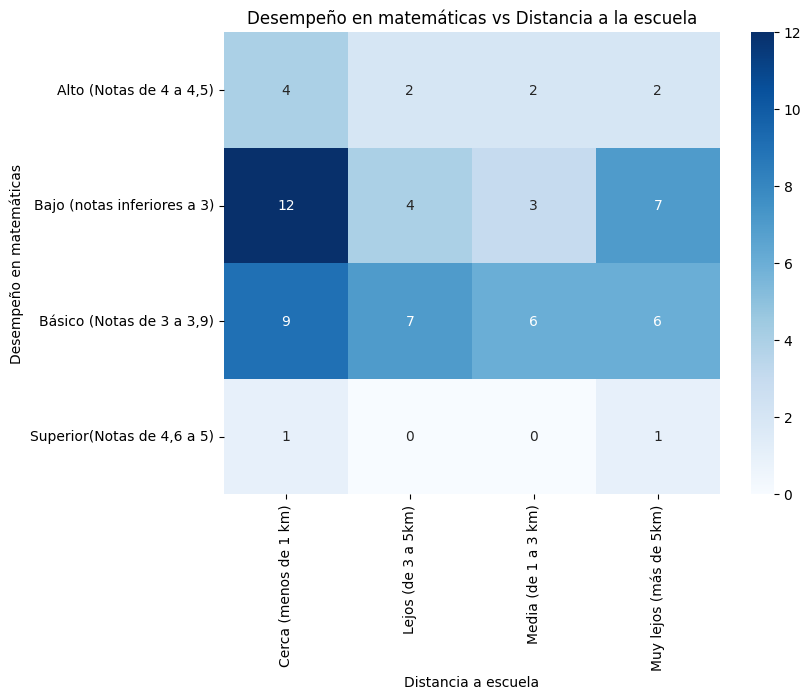

In [65]:
#Gráfico de calor (heatmap) de Desempeño en matemáticas y Distancia a escuela
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_contingencia5, annot=True, cmap='Blues', fmt='d')
plt.title('Desempeño en matemáticas vs Distancia a la escuela')



Análisis

No se puede concluir que la distancia a la escuela influya directamente en el desempeño en el área de matemáticas


##Desempeño en matemáticas Vs Medio de transporte

In [66]:
#descriptores numéricos del analisis bivariado Desempeño en matemáticas con Medio de transporte
df.groupby('Desempeño en matemáticas')['Medio de transporte'].describe()

,count,unique,top,freq
Desempeño en matemáticas,,,,
"Alto (Notas de 4 a 4,5)",10,3,A pie,8
Bajo (notas inferiores a 3),26,2,A pie,25
"Básico (Notas de 3 a 3,9)",28,2,A pie,26
"Superior(Notas de 4,6 a 5)",2,1,A pie,2


In [67]:
#Tabla de contingencia entre Desempeño en matemáticas y Medio de transporte
tabla_contingencia6 = pd.crosstab(df['Desempeño en matemáticas'], df['Medio de transporte'])
#Mostrar tabla de contingencia
tabla_contingencia6

Medio de transporte,A pie,En carro,En motocicleta
Desempeño en matemáticas,,,
"Alto (Notas de 4 a 4,5)",8,1,1
Bajo (notas inferiores a 3),25,0,1
"Básico (Notas de 3 a 3,9)",26,0,2
"Superior(Notas de 4,6 a 5)",2,0,0


Text(0.5, 1.0, 'Desempeño en matemáticas vs Medio de transporte')

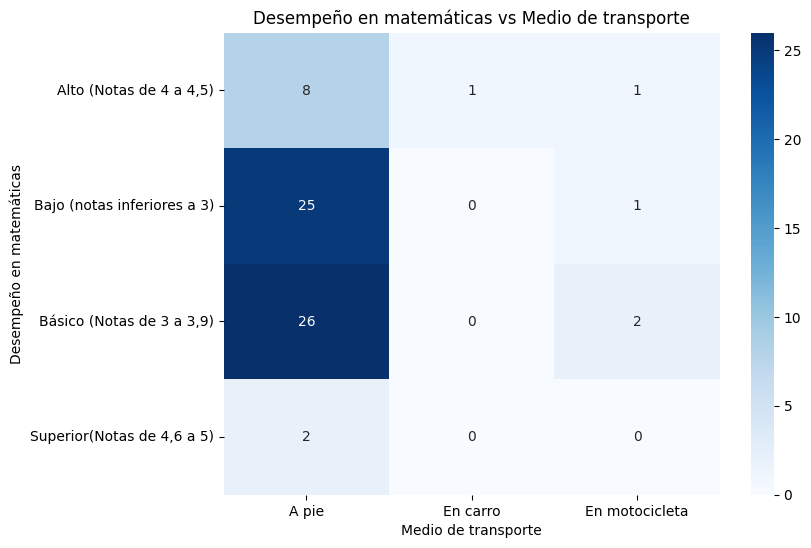

In [68]:
#Gráfico de calor (heatmap) de Desempeño en matemáticas y Medio de transporte
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_contingencia6, annot=True, cmap='Blues', fmt='d')
plt.title('Desempeño en matemáticas vs Medio de transporte')

Análisis:
Dado que la mayoría de los estudiantes se desplazan a pie para ir a la escuela y los desempeños en el área de matemáticas se dan en todos los niveles, no se puede concluir que exista una correlación entre el medio de transporte a la escuela y el nivel de desempeño en el área de matemáticas del estudiante.


# Conclusiones

El análisis estadístico de los datos nos permite concluir que:

* El bajo rendimiento en el área de matemáticas en la institución educativa el hobo en los grados de 9 a 11 está fuertemente influenciado por la falta de acompañamiento y seguimiento de los padres, este factor abre las posibilidades a implementar estrategias desde la escuela como los son escuelas de padres y seguimiento a tareas y actividades, queda para el estudio determinar cual es el nivel académico de los padres o acudientes y encontrar si existe una correlación fuerte con este aspecto.
* Los estudiantes no poseen una cultura de estudio e investigación, que sumado a la falta de material bibliográfico empeora aun mas esta variable, lo que indicaría que el estudiante solo estudia bajo demanda, si se le deja una tarea o actividad puede que la haga y recurra al uso de tecnologías, pero no hace parte de su interés el investigar.
* No se evidencia una correlación que nos indique que el medio de transporte y el estado de las vías influya sobre el desempeño en matemáticas de los estudiantes encuestados.
* Dentro del plan de mejora en el aula para el área de matemáticas, se debe establecer un acercamiento con los padres de familia y acudientes para establecer compromisos de seguimiento, además se debe incentivar la investigación e interés por las matemáticas, así como la flexibilización y actualización de contenidos, a las redes sociales.
